In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob


In [39]:
csv_path = '/Users/y1u0d2/desktop/Lab/Program/python/RDF/rdf_result/csv/all'
output_path = '/Users/y1u0d2/desktop/Lab/Program/python/RDF/rdf_result/pic/all'
files = glob.glob(f'{csv_path}/*')

In [64]:
def plot_rdf_to_one(data,fig,place):
    center_atom = data['center_atom'].unique()[0]
    another_atom = data['another_atom'].unique()[0]

    ax = fig.add_subplot(2,2,place)
    ax.set_title(f"{center_atom}-{another_atom} RDF", fontsize = 14)
    ax.set_xlabel("r(Å)", size = 10, weight = "light")
    ax.set_ylabel(f"g(r) {center_atom}-{another_atom}", size = 10, weight = "light")
    x = list(map(lambda i: round(float(i),2),data.columns[4:]))
    data.iloc[:,4:] = data.iloc[:,4:] / (4 * np.pi * 0.2)
    mean = data.mean()[1:]
    mean.to_csv(f'./{center_atom}-{another_atom}_mean.csv')
    std = data.std()[1:]

    converge_mean = mean.iloc[44:].mean()
    ax.hlines([converge_mean], 0, 15, "blue", linestyles='dashed')
    ax.text(0.1,round(float(converge_mean),3),f'{round(float(converge_mean),3)}')
    ax.fill_between(x, mean + std, mean - std, alpha=0.2, color='red')
    ax.plot(x, mean, color='red')
    return fig

/Users/y1u0d2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()
/Users/y1u0d2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]
/Users/y1u0d2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by Interactiv

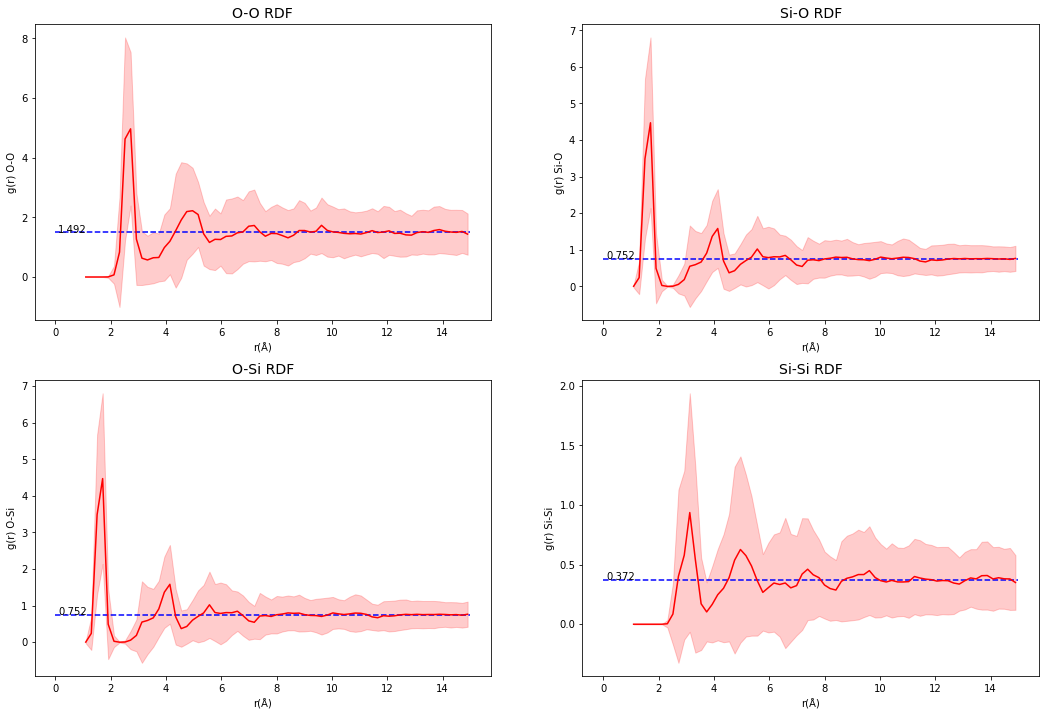

In [65]:
import glob
fig = plt.figure(figsize=(18, 12))
files = glob.glob(f'{csv_path}/*')
structure = ''
for i,file in enumerate(files):
    data = pd.read_csv(file)
    data = data.drop(data.columns[0],axis=1)
    fig = plot_rdf_to_one(data, fig, i+1)
fig.show()
fig.savefig(f'{output_path}/all_converge.png')

In [56]:
df = pd.read_csv(files[0])
df = df.drop(df.columns[0],axis=1)
df.iloc[:,4:] = df.iloc[:,4:] / (4 * np.pi * 0.2)

In [57]:
df

,another_atom,center_atom,structure_idx,name_of_structure,1.1014492753623188,1.3043478260869565,1.5072463768115942,1.710144927536232,1.9130434782608696,2.1159420289855073,...,13.072463768115943,13.27536231884058,13.478260869565219,13.681159420289855,13.884057971014494,14.08695652173913,14.28985507246377,14.492753623188406,14.695652173913045,14.898550724637682
0,O,O,421,stishovite,0.0,0.0,0.0,0.0,0.000000,0.833557,...,1.677200,4.373256,2.059255,2.612541,4.460667,2.399884,3.279081,2.601789,3.562314,3.221414
1,O,O,347,stishovite,0.0,0.0,0.0,0.0,0.405934,2.573949,...,2.353256,3.537694,2.553340,3.421405,3.534808,2.843123,2.968488,3.152497,3.415850,3.124803
2,O,O,353,stishovite,0.0,0.0,0.0,0.0,0.000000,0.000000,...,3.062082,1.637901,1.539696,2.855501,1.589725,1.931696,2.321551,2.643217,3.721167,2.627704
3,O,O,435,stishovite,0.0,0.0,0.0,0.0,0.000000,1.364228,...,1.933853,3.827207,2.503993,2.699627,4.102764,2.561139,3.126524,2.837362,3.369229,3.396791
4,O,O,409,stishovite,0.0,0.0,0.0,0.0,0.000000,0.162680,...,1.671474,4.464563,1.883970,2.654797,4.555846,2.208446,3.523778,2.520286,3.563982,3.025969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,O,O,626,beta-quartz,0.0,0.0,0.0,0.0,0.000000,0.000000,...,1.174462,0.993333,1.196763,0.905455,0.620924,0.722010,0.828614,1.080572,0.839173,0.842406
8546,O,O,140,beta-quartz,0.0,0.0,0.0,0.0,0.000000,0.000000,...,1.369124,1.228991,1.411482,1.627822,1.690797,1.066975,1.284012,1.376167,1.646197,1.063548
8547,O,O,168,beta-quartz,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.665049,0.725500,1.953019,0.733763,1.424934,1.301341,0.850921,1.695690,0.908754,1.449267
8548,O,O,197,beta-quartz,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.818322,0.943205,1.375475,1.181576,1.267281,1.163242,1.226782,1.226324,1.256941,1.176282
